In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('titanic/train.csv')

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.shape

(891, 12)

In [6]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [7]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Conclutions:
## 1 Missing values in Age, Cabin, and Embarked columns.
## 2 More than 70% values are missing in cabin columns, will drop it.
## 3 Few columns have inappropriate data types.


In [9]:
# Dropping cabin column

df.drop(columns=['Cabin'], inplace=True)

In [10]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
# Filling missing values
# mean for Age
# value with maximum counts(S)
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Embarked'].fillna('S', inplace=True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [14]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

## Change data type of few columns 
Survived( category)  
PClass( category)  
Sex( category)  
Embarked( category)  
Age( int)  

In [15]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Embarked']=df['Embarked'].astype('category')
df['Age']=df['Age'].astype('int')

In [16]:
df.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age               int64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object

In [17]:
df.describe()


,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


# Univariate Analysis
Starting with Survived Column

Out of 891 62% people died in the accident


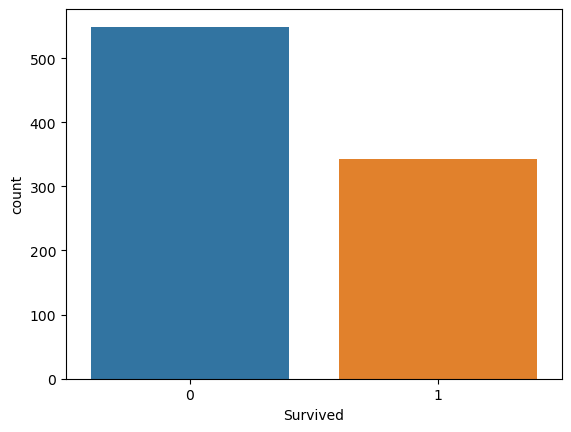

In [18]:
sns.countplot(x = "Survived", data = df)

death_percent=round((df['Survived'].value_counts().values[0]/891)*100)

print("Out of 891 {}% people died in the accident".format(death_percent))

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

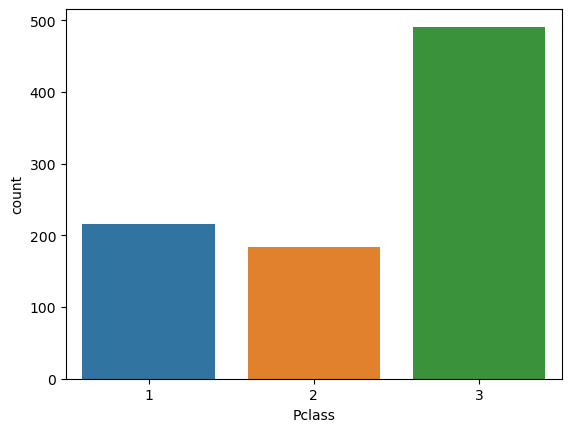

In [19]:
# Pclass column

print((df['Pclass'].value_counts()/891)*100)

sns.countplot(x = "Pclass", data = df)

# Conclusion : 3rd was the most crowded class

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

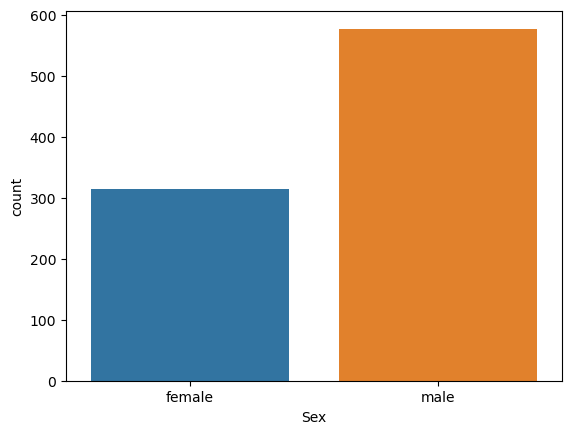

In [20]:
print((df['Sex'].value_counts()/891)*100)
sns.countplot(x = "Sex", data = df)

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<Axes: xlabel='SibSp', ylabel='count'>

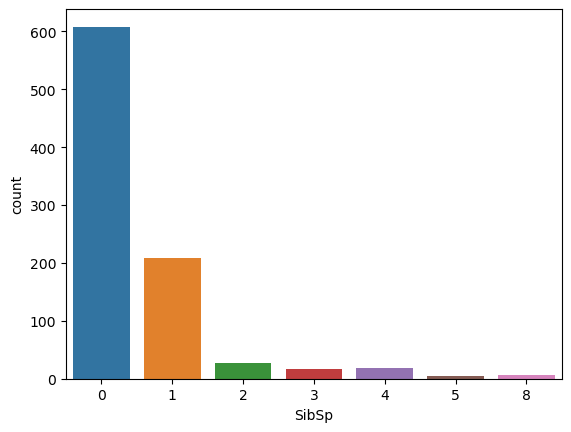

In [21]:
print(df['SibSp'].value_counts())
sns.countplot(x = 'SibSp', data=df)

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


<Axes: xlabel='Parch', ylabel='count'>

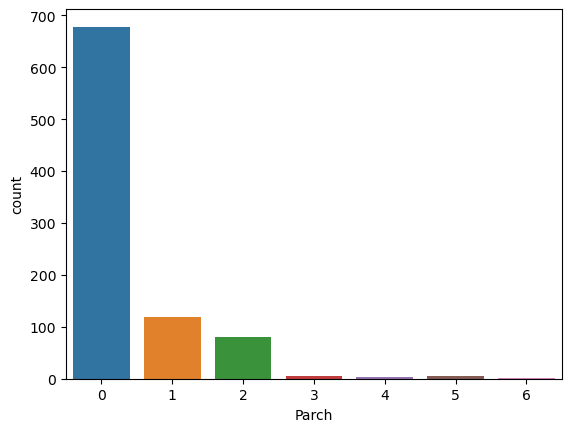

In [22]:
print(df['Parch'].value_counts())
sns.countplot(x = 'Parch', data=df)

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


<Axes: xlabel='Embarked', ylabel='count'>

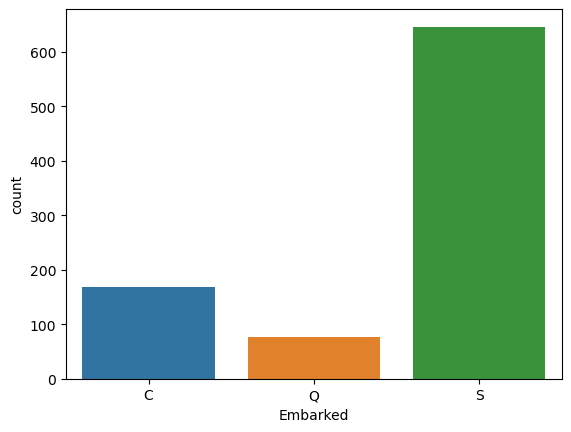

In [23]:
print(df['Embarked'].value_counts())
sns.countplot(x = 'Embarked', data=df)

1. Shows the slight positive Skewness of 0.45956263424701577 meaning data is slightly skewed towards right.
2. Shows the slight positive Kurtosis (peakedness) of 0.9865867453652877 meaning the distribution has heavier tails and a sharper peak compared to a normal distribution.


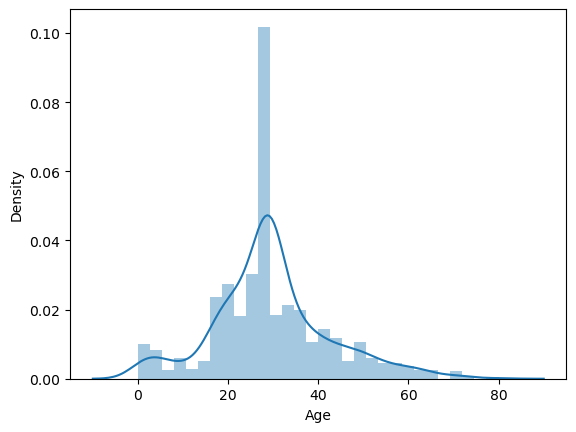

In [24]:
# Age column

sns.distplot(df['Age'])

print(f"1. Shows the slight positive Skewness of {df['Age'].skew()} meaning data is slightly skewed towards right.")

print(f"2. Shows the slight positive Kurtosis (peakedness) of {df['Age'].kurt()} meaning the distribution has heavier tails and a sharper peak compared to a normal distribution.")

<Axes: xlabel='Age'>

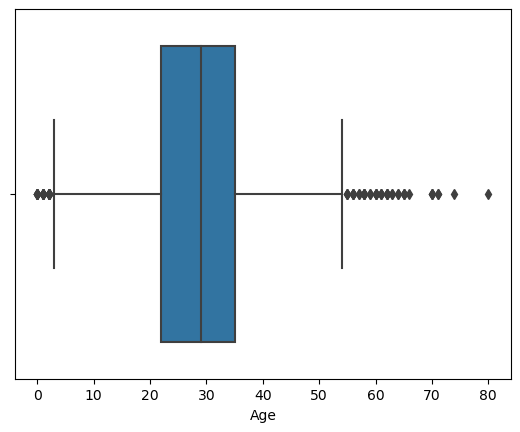

In [25]:
sns.boxplot(x='Age', data=df)

In [26]:
# Checking outliers shown by box plot

print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1 are",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 are 7


## Conclusion
1. Age can be considered as normal distribution.
2. Deeper analysis for outlier detection

1. Shows the positive Skewness of 4.787316519674893 meaning data is skewed highly towards right.
2. Shows the Extreamely high positive Kurtosis (peakedness) of 33.39814088089868 meaning a large no. of people have bought a cheaper ticket.


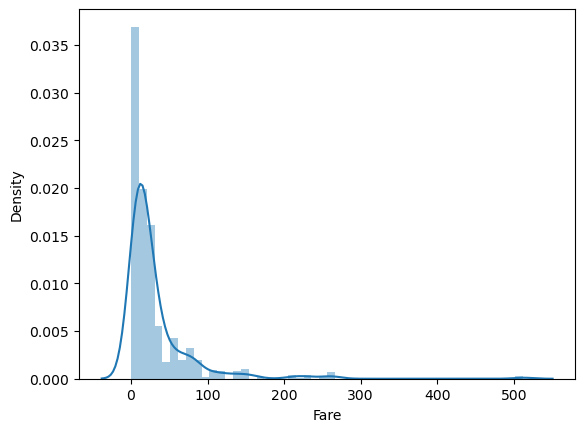

In [27]:

# Fare column

sns.distplot(df['Fare'])
print(f"1. Shows the positive Skewness of {df['Fare'].skew()} meaning data is skewed highly towards right.")
print(f"2. Shows the Extreamely high positive Kurtosis (peakedness) of {df['Fare'].kurt()} meaning a large no. of people have bought a cheaper ticket.")

People with fare in between $200 and $300 are 17
People with fare in greater than $300 are 3


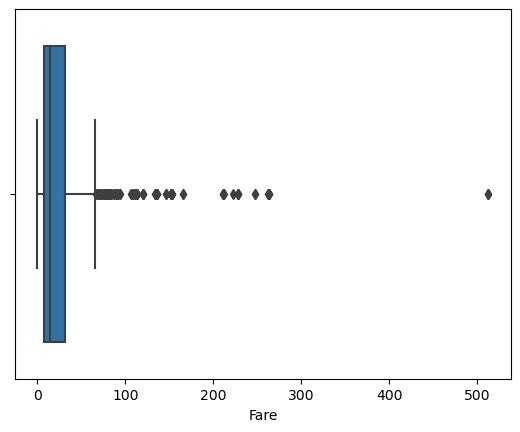

In [28]:
sns.boxplot(x='Fare' , data = df)
print("People with fare in between $200 and $300 are",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300 are",df[df['Fare']>300].shape[0])

## Conclusion 
1. Highly Skewed data, a lot of people had bought a cheaper ticket.
2. Outliers are there in the data.

# Multivariate Analysis

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


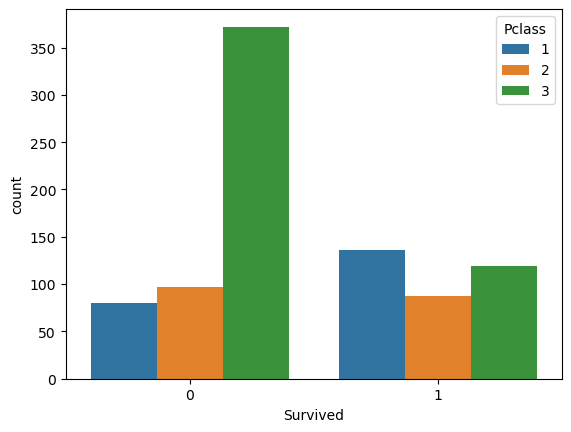

In [29]:
# Survival with Pclass

sns.countplot(x='Survived', hue=df['Pclass'],data=df)

pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


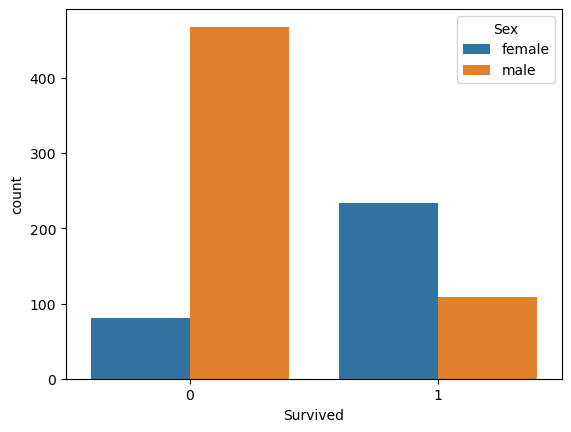

In [30]:
# Survival with Sex

sns.countplot(x = 'Survived', hue=df['Sex'], data=df)

pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


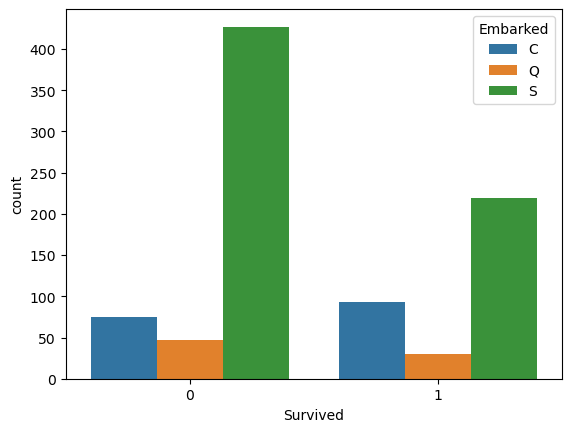

In [31]:
# Survival with Embarked

sns.countplot(x='Survived' , hue=df['Embarked'], data = df)

pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

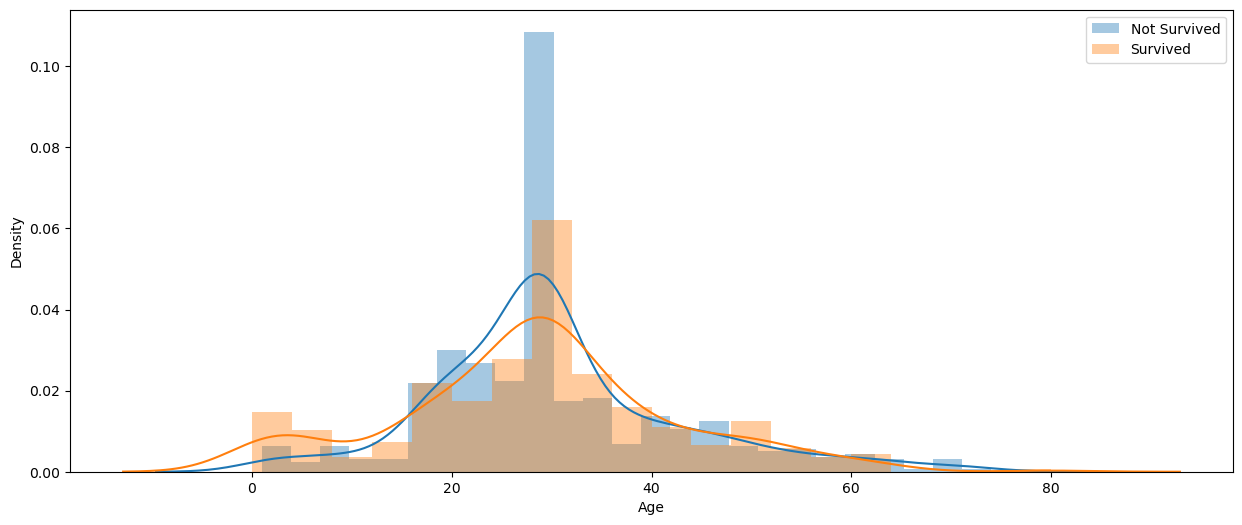

In [32]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'],label='Not Survived')
sns.distplot(df[df['Survived']==1]['Age'], label='Survived')
plt.legend()

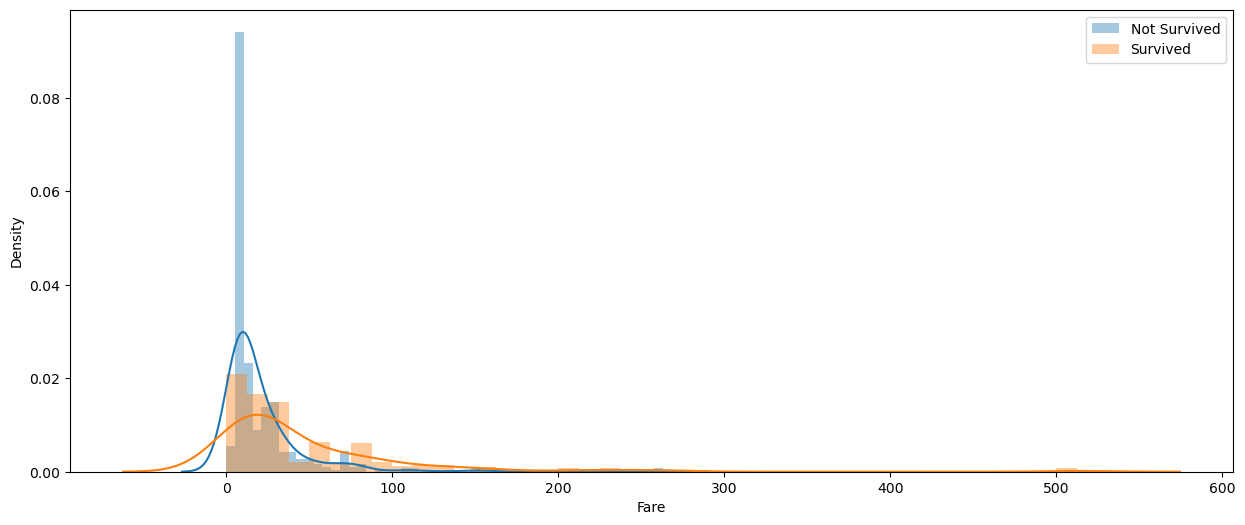

In [33]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'],label='Not Survived')
sns.distplot(df[df['Survived']==1]['Fare'],label='Survived')
plt.legend()

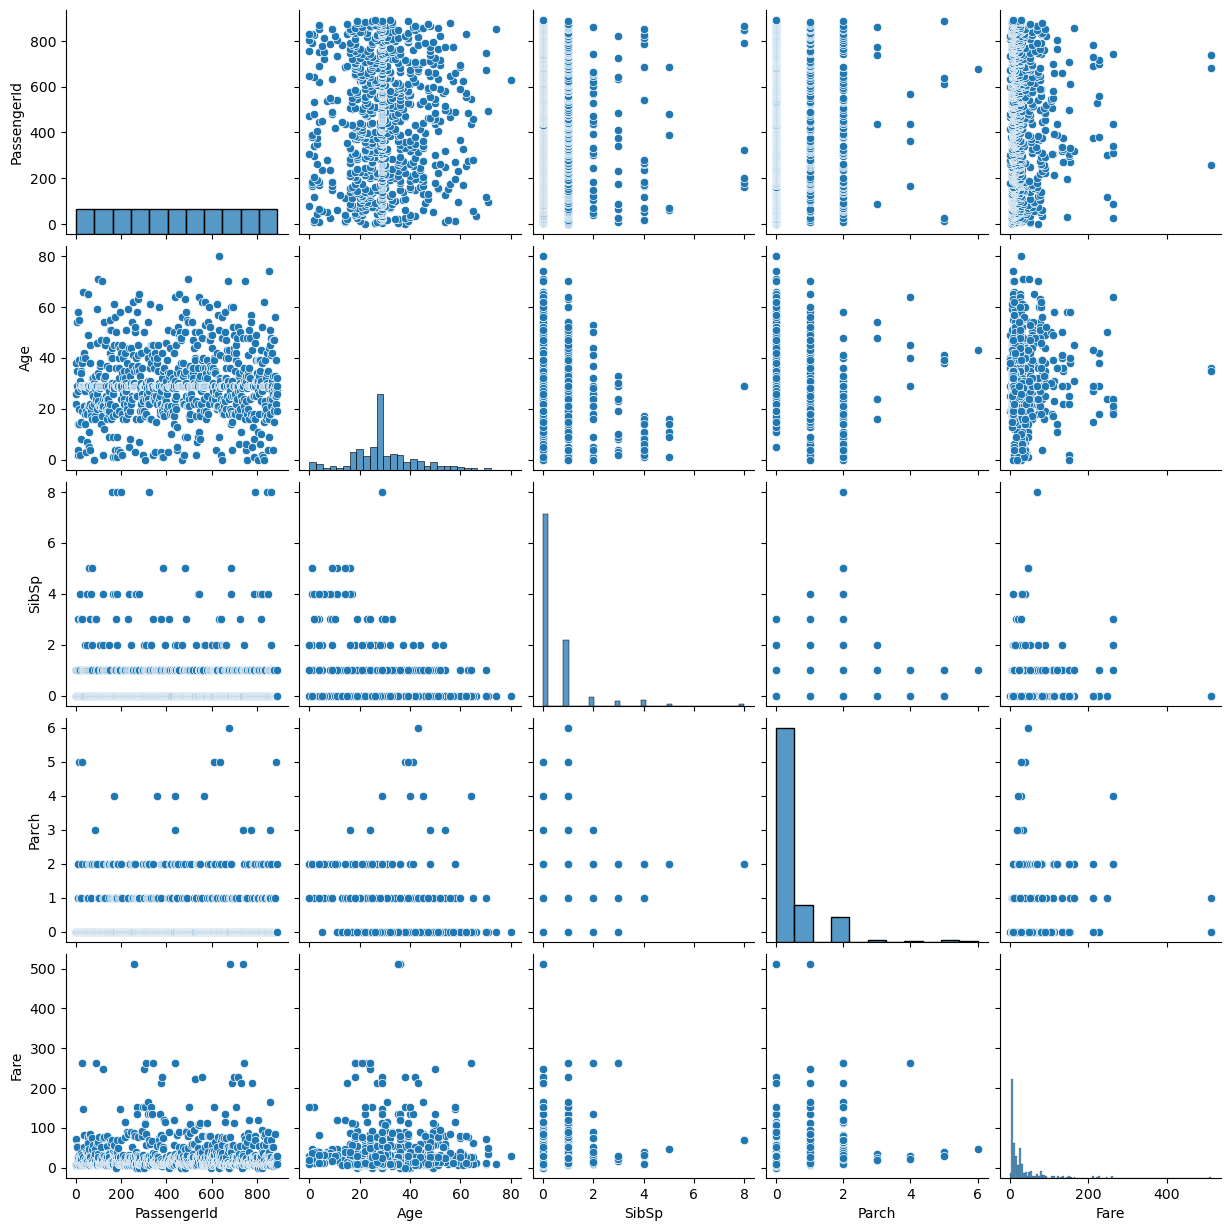

In [34]:
sns.pairplot(df)

<Axes: >

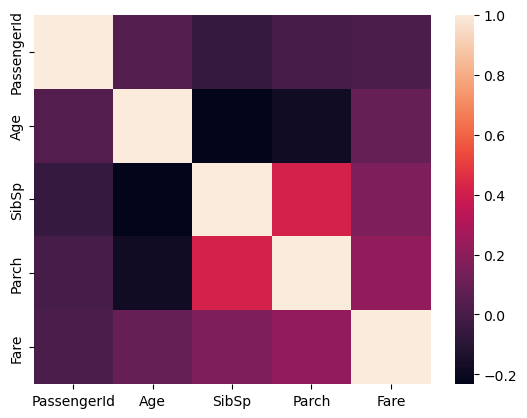

In [35]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df[numerical_columns].corr())

In [36]:
# Feature Engineering

# We will create a new column by the name of family size which will be the sum of SibSp and Parch cols

df['family_size']=df['Parch'] + df['SibSp']

In [37]:
df.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
265,266,0,2,"Reeves, Mr. David",male,36,0,0,C.A. 17248,10.50,S,0
284,285,0,1,"Smith, Mr. Richard William",male,29,0,0,113056,26.00,S,0
143,144,0,3,"Burke, Mr. Jeremiah",male,19,0,0,365222,6.75,Q,0
116,117,0,3,"Connors, Mr. Patrick",male,70,0,0,370369,7.75,Q,0
605,606,0,3,"Lindell, Mr. Edvard Bengtsson",male,36,1,0,349910,15.55,S,1


In [38]:
# Now we will engineer a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [39]:
df['family_type']=df['family_size'].apply(family_type)

In [40]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
382,383,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,0,Alone
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,S,0,Alone
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43,0,1,24160,211.3375,S,1,Medium
635,636,1,2,"Davis, Miss. Mary",female,28,0,0,237668,13.0000,S,0,Alone
168,169,0,1,"Baumann, Mr. John D",male,29,0,0,PC 17318,25.9250,S,0,Alone


In [41]:
# Dropping SibSp, Parch and family_size

df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [42]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
325,326,1,1,"Young, Miss. Marie Grice",female,36,PC 17760,135.6333,C,Alone
380,381,1,1,"Bidois, Miss. Rosalie",female,42,PC 17757,227.5250,C,Alone
174,175,0,1,"Smith, Mr. James Clinch",male,56,17764,30.6958,C,Alone
889,890,1,1,"Behr, Mr. Karl Howell",male,26,111369,30.0000,C,Alone
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24,STON/O2. 3101279,15.8500,S,Medium


In [43]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


# Detecting Outliers

## Numerical Data
1. if the data is following normal distribution, anything beyond 3SD - mean + 3SD can be considered as an outlier
2. if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 * IQR and Q3 + 1.5 * IQR


## Categorical data
1. If the col is highly imbalnced for eg male 10000 and female 2 then we can eliminate female


In [44]:
# handling outliers in age(Almost normal)

df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape


(884, 10)

In [45]:
# handling outliers from Fare column

# Finding quartiles

Q1= np.percentile(df['Fare'],25)
Q3= np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

In [50]:
# One hot encoding

df.sample(4)
pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'],dtype=int, drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,0,1,1,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,0,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,0,1,1,0,1,0,0
5,6,0,"Moran, Mr. James",29,330877,8.4583,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,1,0,1,0,1,0,0
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,0,0,0,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,0,1,0,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,0,0,1,0,0,0,0


In [51]:
df=pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'],dtype=int, drop_first=True)


In [52]:
df.sample(4)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
710,711,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",24,PC 17482,49.5042,0,0,0,0,0,0,0
111,112,0,"Zabour, Miss. Hileni",14,2665,14.4542,0,1,0,0,0,0,1
199,200,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",24,248747,13.0000,1,0,0,0,1,0,0
508,509,0,"Olsen, Mr. Henry Margido",28,C 4001,22.5250,0,1,1,0,1,0,0


<Axes: >

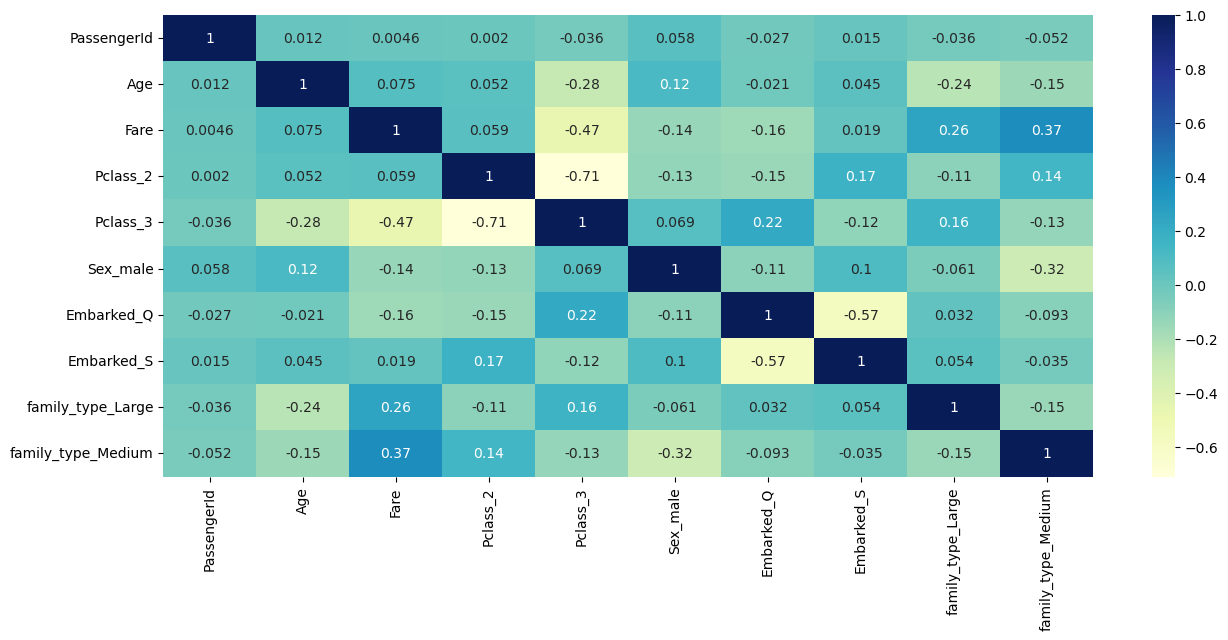

In [62]:
plt.figure(figsize=(15,6))
numerical_columns1 = df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df[numerical_columns1].corr(), cmap='YlGnBu',annot=True)


# Conclusions
1. Chance of female survival is higher than male survival
2. Travelling in Pclass 3 was deadliest
3. Somehow, people going to C survived more
4. People in the age range of 20 to 40 had a higher chance of not surviving
5. People travelling with smaller familes had a higher chance of surviving the accident in comparison to people 6. with large families and travelling alone